In [1]:
import os, sys, errno, time
import numpy as np

import lib.midi as midi
import lib.util as util

import matplotlib.pyplot as plt

In [7]:
scoredir = 'data/score/'
perfdir = 'data/perf/'
gtdir = 'align/ground-beat-interpol/'
spectradir = 'align/spectra/'
chromadir = 'align/chroma/'
cqtdir = 'align/cqt/'
ctc_chromadir = 'align/ctc-chroma'

file = 'Fugue_bwv_846'

In [8]:
perf_audio = os.path.join(perfdir, file + '.wav')
perf_transcript = os.path.join(perfdir, file + '.midi')
score = os.path.join(scoredir, util.map_score(file) + '.midi')
    
gt_align = os.path.join(gtdir, file + '.txt')
sp_align = os.path.join(spectradir, file + '.txt')
ch_align = os.path.join(chromadir, file + '.txt')
cqt_align = os.path.join(cqtdir, file + '.txt')
ctc_chroma_align = os.path.join(ctc_chromadir, file + '.txt')

perf_events,perf_start,perf_end = midi.load_midi_events(perf_transcript, strip_ends=False)
score_events,score_start,score_end = midi.load_midi_events(score, strip_ends=False)

In [11]:
gt_alignment = np.loadtxt(gt_align)
#sp_alignment = np.loadtxt(sp_align)
#ch_alignment = np.loadtxt(ch_align)
#cqt_alignment = np.loadtxt(cqt_align)
#ctc_chroma_alignment = np.loadtxt(ctc_chroma_align)

perfroll = util.pianoroll(perf_events)
groundroll = util.pscore(score_events, gt_alignment, start=perf_start)
#spectraroll = util.pscore(score_events, sp_alignment, start=perf_start)
#chromaroll = util.pscore(score_events, ch_alignment, start=perf_start)
#cqtroll = util.pscore(score_events, cqt_alignment, start=perf_start)
#ctc_chroma_roll = util.pscore(score_events, ctc_chroma_alignment, start=perf_start)

# Visualizing the ground-truth alignment

In [12]:
perfroll

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
perfroll.shape

(55911, 128)

Text(0, 0.5, 'Pitch')

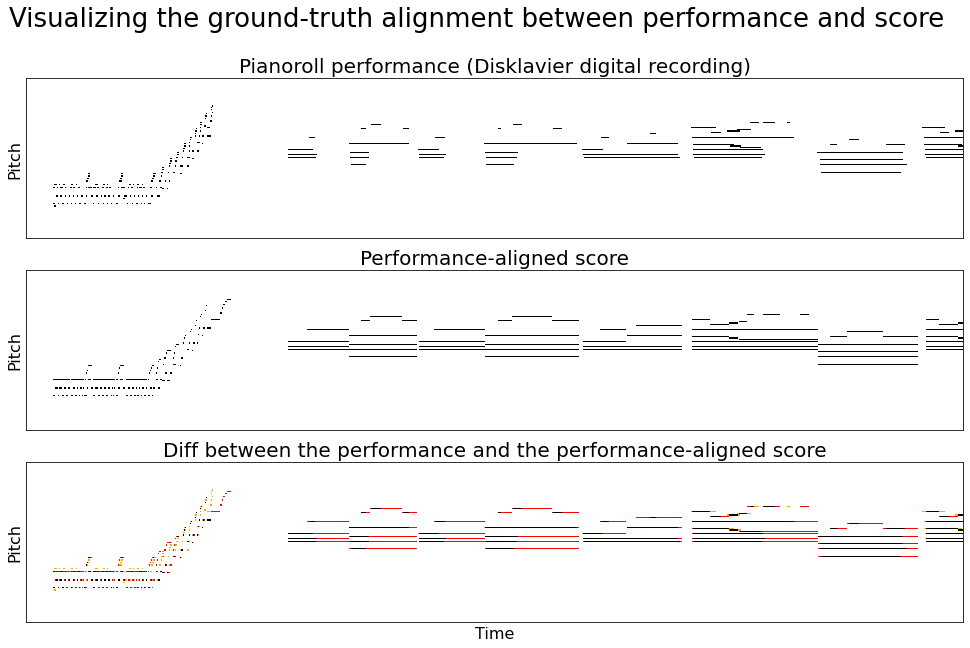

In [36]:
num_windows = 3000
start = 0
end = 128

fig, ax = plt.subplots(3,figsize=(20, 10), sharex=True)
fig.suptitle('Visualizing the ground-truth alignment between performance and score', fontsize=26)

#Not sure I understand this slicing..
ax[0].imshow(perfroll[:, start:end][:num_windows,::-1].T, interpolation='none', cmap='Greys', aspect=4)
ax[0].set_title('Pianoroll performance (Disklavier digital recording)', fontsize=20)
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_ylabel('Pitch', fontsize=16)

ax[1].imshow(groundroll[:, start:end][:num_windows,::-1].T, interpolation='none', cmap='Greys', aspect=4)
ax[1].set_title('Performance-aligned score', fontsize=20)
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[1].set_ylabel('Pitch', fontsize=16)

util.colorplot(ax[2], perfroll[:,start:end][:num_windows,::-1], groundroll[:num_windows,start:end][:,::-1])
ax[2].set_title('Diff between the performance and the performance-aligned score', fontsize=20)
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[2].set_xlabel('Time', fontsize=16)
ax[2].set_ylabel('Pitch', fontsize=16)

# Comparing alignment algorithms to the ground-truth alignment

Text(0, 0.5, 'Pitch')

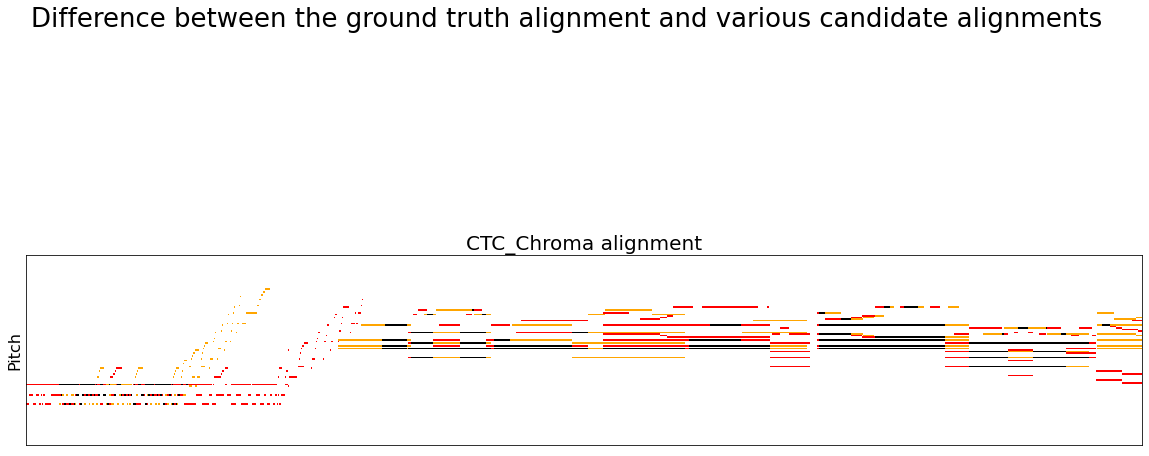

In [39]:
num_windows = 3000
start=0
end=128

fig, ax = plt.subplots(1,figsize=(20, 10),sharex=True) #change to the number of plots I ever intend to make
fig.suptitle('Difference between the ground truth alignment and various candidate alignments', fontsize=26)

util.colorplot(ax, groundroll[:,start:end][:num_windows,::-1], ctc_chroma_roll[:num_windows,start:end][:,::-1])
ax.set_title('CTC_Chroma alignment', fontsize=20)
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('Pitch', fontsize=16)

##############
#util.colorplot(ax[0], groundroll[:,start:end][:num_windows,::-1], spectraroll[:num_windows,start:end][:,::-1])
#ax[0].set_title('Spectrogram alignment', fontsize=20)
#ax[0].set_xticks([]); ax[0].set_yticks([])
#ax[0].set_ylabel('Pitch', fontsize=16)
#util.colorplot(ax[1], groundroll[:,start:end][:num_windows,::-1], chromaroll[:num_windows,start:end][:,::-1])
#ax[1].set_title('Chromagram alignment', fontsize=20)
#ax[1].set_xticks([]); ax[1].set_yticks([])
#ax[1].set_ylabel('Pitch', fontsize=16)
#util.colorplot(ax[2], groundroll[:,start:end][:num_windows,::-1], cqtroll[:num_windows,start:end][:,::-1])
#ax[2].set_title('CQT alignment', fontsize=20)
#ax[2].set_xticks([]); ax[2].set_yticks([])
#ax[2].set_xlabel('Time', fontsize=16)
#ax[2].set_ylabel('Pitch', fontsize=16)

Text(0, 0.5, 'Beat Time in Performance (s)')

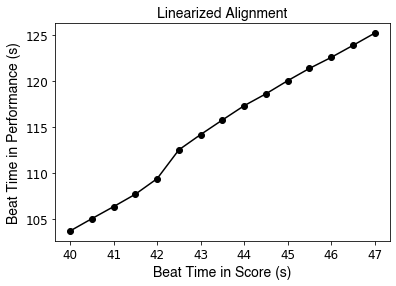

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#font = {'family' : 'normal',
#        'weight' : 'normal',
#        'size'   : 16, 
#         }

#matplotlib.rc('xtick', labelsize=12) 
#matplotlib.rc('ytick', labelsize=12) 

#plt.rcParams.update({'axes.labelcolor': "black"})

#matplotlib.rc('font', **font)


### Showing the idea of interpolation for ground truths:
path = '/Users/aliamorsi/Desktop/phD/a2s_with_dtw_survey/pitchclass_mctc/data/asap-preludes/Bach/Prelude/bwv_883/'

score_beat_annotation = os.path.join(path, 'midi_score_annotations.txt')
perf_beat_annotation = os.path.join(path, 'GuoE01M_annotations.txt')

score_beat_annot_df =  pd.read_csv(score_beat_annotation, delimiter='\t', header=None)
perf_beat_annot_df =  pd.read_csv(perf_beat_annotation, delimiter='\t', header=None)

start_i = 80
end_i = 95
#1. load a beat annotation
plt.xlabel('Beat in Score (s)')
plt.ylabel('Beat in Performance (s)')
plt.plot(score_beat_annot_df[0][start_i:end_i], perf_beat_annot_df[0][start_i:end_i], marker='o', c='k')
#plt.plot(score_beat_annot_df[0][start_i:end_i], perf_beat_annot_df[0][start_i:end_i], 'kx')
#. plot only a subset of it?

csfont = {'fontname':'Helvetica', 'fontsize': 14, 'fontweight': 'bold'}
hfont = {'fontname':'Helvetica', 'fontsize': 14}
    
plt.title('Linearized Alignment', **csfont)
plt.xlabel('Beat Time in Score (s)', **hfont)
plt.ylabel('Beat Time in Performance (s)', **hfont)



# Put red xs on the data points

#see if I can overlay with a dotted line on a hypothetical data point.



In [35]:
score_beat_annot_df.shape

(127, 3)